# Logit Gates and Matrix Operations

https://quantum-computing.ibm.com/lab

Qubit Quantum Logic Gates
===

Bloch Sphere
---
$$ \text{qubit }|\psi>=\left(\cos\frac{\theta}{2},e^{i\phi}\sin\frac{\theta}{2}\right)=\alpha|0>+\beta|1>$$

<img src="https://akyrillidis.github.io/notes/quant_7/bloch.png" width=30%>


A `quantum logic gate` (or simply `quantum gate`) is a basic quantum circuit operating on a small number of qubits. For instance, the following, $X$-gate, interchange circuit:

\begin{eqnarray}
X-\text{gate} =&\begin{pmatrix}0&1\\1&0\end{pmatrix}\\
\end{eqnarray}
Description
---
$$ X\begin{pmatrix}\alpha \cr \beta\end{pmatrix}=
   \begin{pmatrix}0&1\\1&0\end{pmatrix}\begin{pmatrix}\alpha \cr \beta\end{pmatrix}=\begin{pmatrix}\beta \cr \alpha\end{pmatrix}
$$
Thus
$$ X|0>=|1> \text{ and } X|1>=|0>$$

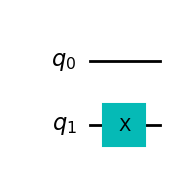

In [1]:
#Program 3.1a Apply X-gate to qubit
from qiskit import QuantumCircuit
qc = QuantumCircuit(2)
qc.x(1)
qc.draw('mpl')

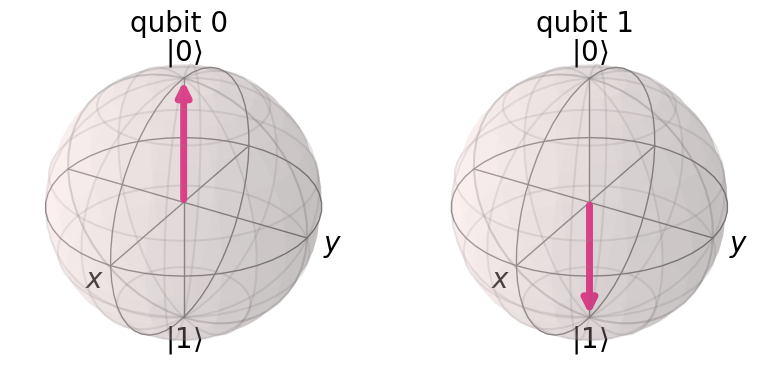

In [2]:
#Program 3.1b Show Bloch sphere of qubit w/wo X-gate
from qiskit.quantum_info import Statevector
state = Statevector.from_instruction(qc)
state.draw('bloch')

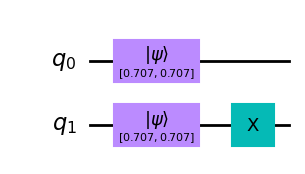

In [10]:
# what the effect of X on |+> and |->
from qiskit import QuantumCircuit
from math import sqrt
qc = QuantumCircuit(2)
qc.initialize([1/sqrt(2), 1/sqrt(2)],0)
qc.initialize([1/sqrt(2), 1/sqrt(2)],1)
qc.x(1)
qc.draw('mpl')

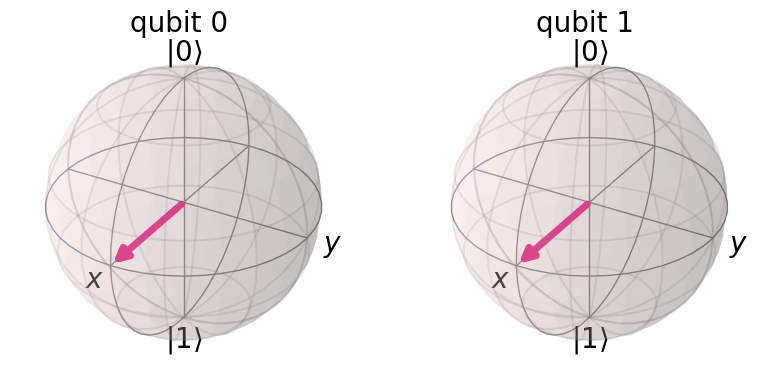

In [11]:
from qiskit.quantum_info import Statevector
state = Statevector.from_instruction(qc)
state.draw('bloch')

$$\begin{pmatrix}0&1\\1&0\end{pmatrix} 
|+>=
\begin{pmatrix}0&1\\1&0\end{pmatrix}
 \begin{pmatrix}1/\sqrt2\\1/\sqrt2\end{pmatrix}
 =\begin{pmatrix}1/\sqrt2\\1/\sqrt2\end{pmatrix}=|+>
$$

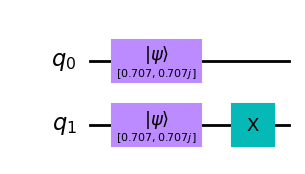

In [12]:
# what the effect of X on |↻> and |↺>
from qiskit import QuantumCircuit
from math import sqrt
qc = QuantumCircuit(2)
qc.initialize([1/sqrt(2), 1j/sqrt(2)],0)
qc.initialize([1/sqrt(2), 1j/sqrt(2)],1)
qc.x(1)
qc.draw('mpl')

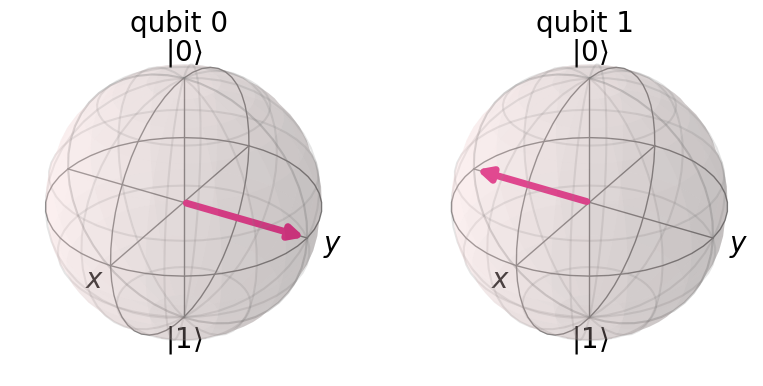

In [13]:
from qiskit.quantum_info import Statevector
state = Statevector.from_instruction(qc)
state.draw('bloch')

$[X,Y,Z]$ - Gate, rotate $180^\circ$ about $[X,Y,Z]$-axis 
\begin{eqnarray}
X-\text{gate} &=& \begin{pmatrix}0&1\\1&0\end{pmatrix}\\
Y-\text{gate} &=& \begin{pmatrix}0&-i\\i&0\end{pmatrix}\\
Z-\text{gate} &=& \begin{pmatrix}1&0\\0&-1\end{pmatrix}\\
\end{eqnarray}

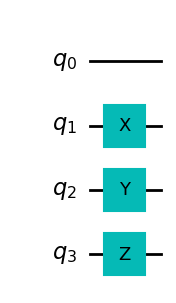

In [22]:
#Program 3.7a Apply X-, Y-, and Z-gate to qubit
from qiskit import QuantumCircuit
qc = QuantumCircuit(4)
qc.x(1)
qc.y(2)
qc.z(3)
qc.draw('mpl')

The first result could be calculated by:
$$\begin{pmatrix}0&1\\1&0\end{pmatrix} 
|0>=
\begin{pmatrix}0&1\\1&0\end{pmatrix}
 \begin{pmatrix}1\\0\end{pmatrix}
 =\begin{pmatrix}0\\1\end{pmatrix}=|1>
$$

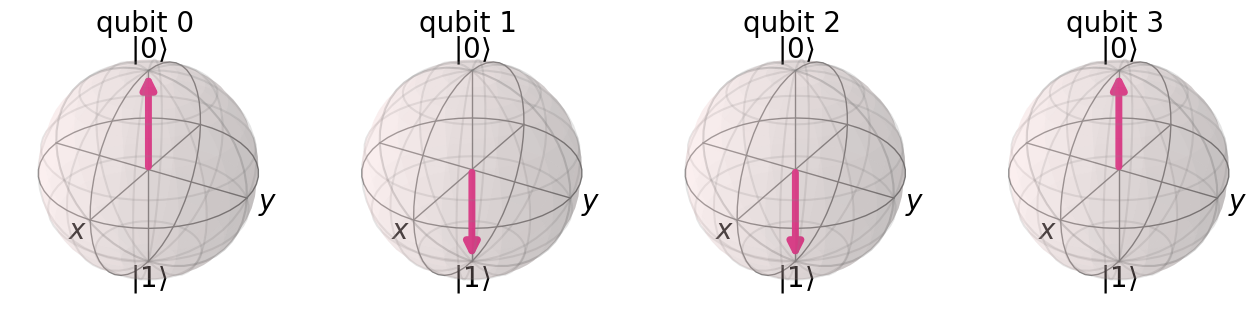

In [23]:
#Program 3.7b Show Bloch sphere of qubit w/ X-, Y-, and Z-gate
from qiskit.quantum_info import Statevector
state = Statevector.from_instruction(qc)
state.draw('bloch')

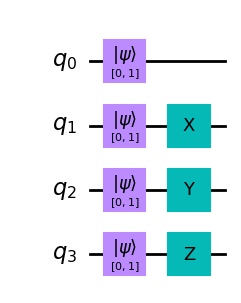

In [24]:
qc = QuantumCircuit(4)
qc.initialize([0, 1],0)
qc.initialize([0, 1],1)
qc.initialize([0, 1],2)
qc.initialize([0, 1],3)
qc.x(1)
qc.y(2)
qc.z(3)
qc.draw('mpl')

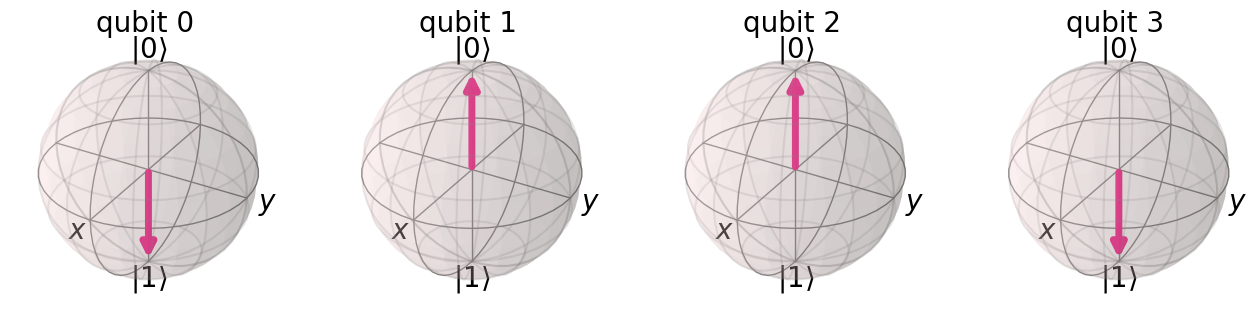

In [25]:
#Program 3.7b show 11> with X,Y,Z-gate
from qiskit.quantum_info import Statevector
state = Statevector.from_instruction(qc)
state.draw('bloch')

In [ ]:
qc = QuantumCircuit(4)
qc.initialize([1/sqrt(2), 1/sqrt(2)],0)
qc.initialize([1/sqrt(2), -1/sqrt(2)],1)
qc.h(2)
qc.x(3)
qc.h(3)
qc.draw('mpl')

$$ q=\frac{1}{\sqrt3}|0>+\frac{\sqrt2}{\sqrt3}|1>$$
Mesurement:
$$ \alpha^2=\left(\frac{1}{\sqrt3} \right)^2=\frac{1}{3}$$
and 
$$ \beta^2=\left(\frac{\sqrt2}{\sqrt3} \right)^2=\frac{2}{3}$$


     ┌────────────────────────────┐┌─┐
  q: ┤ Initialize(0.57735,0.8165) ├┤M├
     └────────────────────────────┘└╥┘
c: 1/═══════════════════════════════╩═
                                    0 
Counts: {'0': 311, '1': 689}


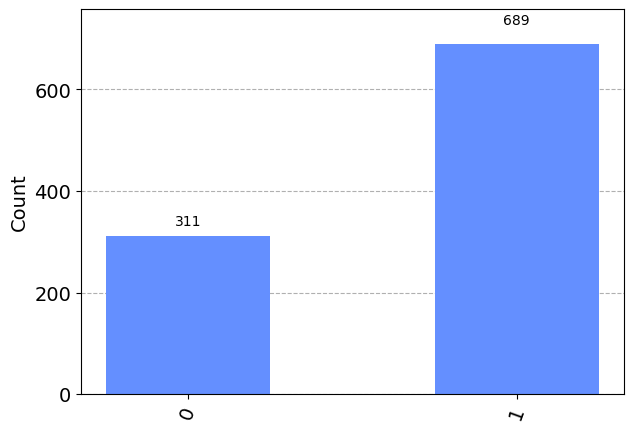

In [1]:
#Program 3.2a Measure state of qubit w/o X-gate
from qiskit import QuantumCircuit,execute
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram
from math import sqrt
qc = QuantumCircuit(1,1)
qc.initialize([sqrt(1/3), sqrt(2/3)],0)
qc.measure([0],[0])
print(qc)
sim=AerSimulator()
job=execute(qc, backend=sim, shots=1000)
result=job.result()
counts=result.get_counts(qc)
print("Counts:",counts)
plot_histogram(counts)

$$X\begin{pmatrix}\alpha\\ \beta\end{pmatrix}=\begin{pmatrix}\beta\\ \alpha\end{pmatrix}$$

Pass: ContainsInstruction - 0.01192 (ms)
Pass: UnitarySynthesis - 0.00191 (ms)
Pass: HighLevelSynthesis - 0.28300 (ms)
Pass: UnrollCustomDefinitions - 0.10800 (ms)
Begin BasisTranslator from source basis {('initialize', 1), ('x', 1), ('measure', 1)} to target basis {'csx', 'save_probabilities', 'mcy', 'measure', 'barrier', 'unitary', 'cy', 'u3', 'mcp', 'cswap', 'kraus', 'initialize', 'ecr', 'mcrz', 'mcu1', 'save_amplitudes_sq', 'cu1', 'mcry', 'reset', 'for_loop', 'save_stabilizer', 'tdg', 'set_unitary', 'rzx', 'mcu', 'sdg', 'mcz', 'qerror_loc', 'set_matrix_product_state', 'u1', 'swap', 'save_density_matrix', 'save_probabilities_dict', 'save_state', 'ccx', 'z', 'save_expval', 'mcx_gray', 'mcr', 'cp', 'mcphase', 'save_clifford', 'cu3', 'rz', 'if_else', 'r', 'save_unitary', 'cu2', 'superop', 'save_superop', 'roerror', 'save_statevector', 'while_loop', 'cz', 'mcsx', 'sx', 'cu', 'cx', 'mcx', 'rx', 'x', 'ry', 'ryy', 'save_statevector_dict', 'set_superop', 'u', 'mcu2', 'multiplexer', 'delay',

     ┌────────────────────────────┐┌───┐┌─┐
  q: ┤ Initialize(0.57735,0.8165) ├┤ X ├┤M├
     └────────────────────────────┘└───┘└╥┘
c: 1/════════════════════════════════════╩═
                                         0 
Counts: {'0': 672, '1': 328}


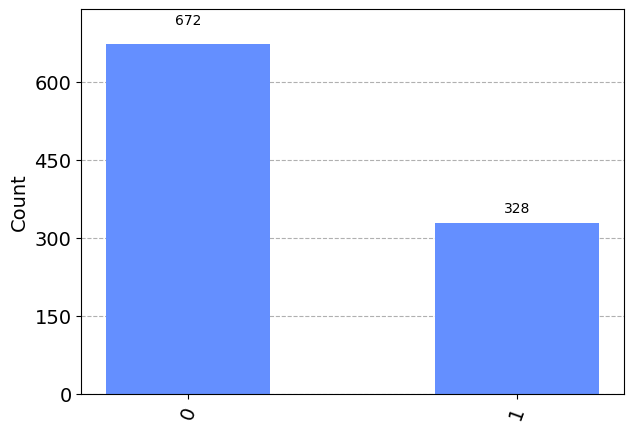

In [4]:
#Program 3.2b Measure state of qubit w/ X-gate
from qiskit import QuantumCircuit,execute
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram
import math
qc = QuantumCircuit(1,1)
qc.initialize([math.sqrt(1/3), math.sqrt(2/3)],0)
qc.x(0)
qc.measure([0],[0])
print(qc)
sim=AerSimulator()
job=execute(qc, backend=sim, shots=1000)
result=job.result()
counts=result.get_counts(qc)
print("Counts:",counts)
plot_histogram(counts)

$[X,Y,Z]$ - Gate, rotate $180^\circ$ about $[X,Y,Z]$-axis 
\begin{eqnarray}
X-\text{gate} &=& \begin{pmatrix}0&1\\1&0\end{pmatrix}\\
Y-\text{gate} &=& \begin{pmatrix}0&-i\\i&0\end{pmatrix}\\
Z-\text{gate} &=& \begin{pmatrix}1&0\\0&-1\end{pmatrix}\\
\end{eqnarray}

Hadamard Gate
---
$$H = \frac{1}{\sqrt2}\begin{pmatrix}1&1\\1&-1\end{pmatrix}$$
Thus
$$ H|0>=\frac{1}{\sqrt2}\begin{pmatrix}1\\1\end{pmatrix}=|+>$$
$$ H|1>=\frac{1}{\sqrt2}\begin{pmatrix}-1\\1\end{pmatrix}=|->$$


```
                0    -
                ⬆︎ ⬈ 
                   ➡︎
               ⬋ ⬇︎ 
              +  1
   

```


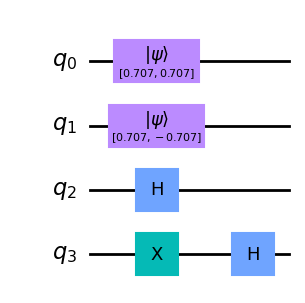

In [5]:
#Program 3.3a Apply X-gate and H-gate to qubit
from qiskit import QuantumCircuit

qc = QuantumCircuit(4)
qc.initialize([1/sqrt(2), 1/sqrt(2)],0)
qc.initialize([1/sqrt(2), -1/sqrt(2)],1)
qc.h(2)
qc.x(3)
qc.h(3)
qc.draw('mpl')

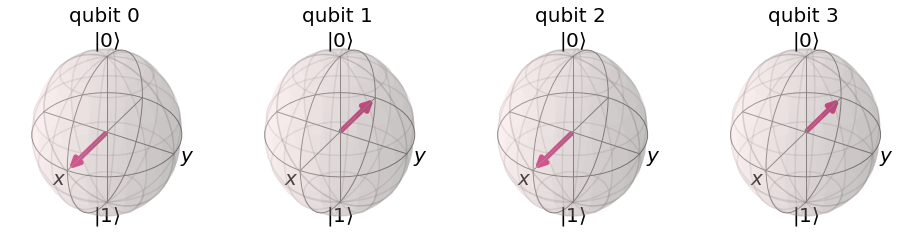

In [6]:
#Program 3.3b Show Bloch sphere of qubit w/ X-gate and H-gate
from qiskit.quantum_info import Statevector
state = Statevector.from_instruction(qc)
state.draw('bloch')

Pass: ContainsInstruction - 0.01383 (ms)
Pass: UnitarySynthesis - 0.00310 (ms)
Pass: HighLevelSynthesis - 0.23127 (ms)
Pass: UnrollCustomDefinitions - 0.13018 (ms)
Begin BasisTranslator from source basis {('measure', 1), ('h', 1)} to target basis {'csx', 'save_probabilities', 'mcy', 'measure', 'barrier', 'unitary', 'cy', 'u3', 'mcp', 'cswap', 'kraus', 'initialize', 'ecr', 'mcrz', 'mcu1', 'save_amplitudes_sq', 'cu1', 'mcry', 'reset', 'for_loop', 'save_stabilizer', 'tdg', 'set_unitary', 'rzx', 'mcu', 'sdg', 'mcz', 'qerror_loc', 'set_matrix_product_state', 'u1', 'swap', 'save_density_matrix', 'save_probabilities_dict', 'save_state', 'ccx', 'z', 'save_expval', 'mcx_gray', 'mcr', 'cp', 'mcphase', 'save_clifford', 'cu3', 'rz', 'if_else', 'r', 'save_unitary', 'cu2', 'superop', 'save_superop', 'roerror', 'save_statevector', 'while_loop', 'cz', 'mcsx', 'sx', 'cu', 'cx', 'mcx', 'rx', 'x', 'ry', 'ryy', 'save_statevector_dict', 'set_superop', 'u', 'mcu2', 'multiplexer', 'delay', 's', 'u2', 't', 's

This is |+>:
     ┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0 
Counts: {'0': 500, '1': 500}


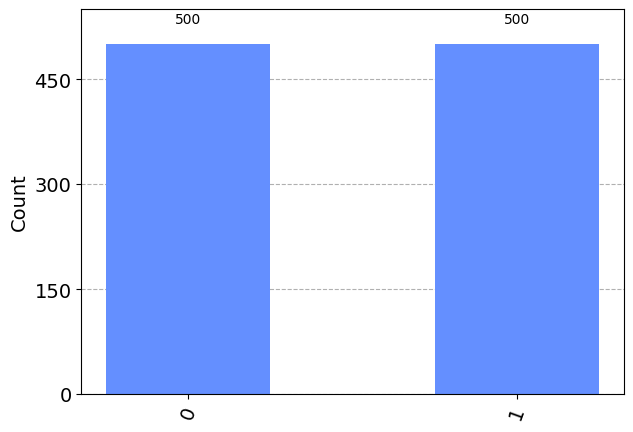

In [6]:
#Program 3.4 Measure state of qubit w/ H-gate
from qiskit import QuantumCircuit,execute
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram
qc = QuantumCircuit(1,1)
qc.h(0)
qc.measure([0],[0])
print("This is |+>:")
print(qc)
sim=AerSimulator()
job=execute(qc, backend=sim, shots=1000)
result=job.result()
counts=result.get_counts(qc)
print("Counts:",counts)
plot_histogram(counts)

Pass: ContainsInstruction - 0.01192 (ms)
Pass: UnitarySynthesis - 0.00310 (ms)
Pass: HighLevelSynthesis - 0.24295 (ms)
Pass: UnrollCustomDefinitions - 0.06104 (ms)
Begin BasisTranslator from source basis {('measure', 1), ('x', 1), ('h', 1)} to target basis {'csx', 'save_probabilities', 'mcy', 'measure', 'barrier', 'unitary', 'cy', 'u3', 'mcp', 'cswap', 'kraus', 'initialize', 'ecr', 'mcrz', 'mcu1', 'save_amplitudes_sq', 'cu1', 'mcry', 'reset', 'for_loop', 'save_stabilizer', 'tdg', 'set_unitary', 'rzx', 'mcu', 'sdg', 'mcz', 'qerror_loc', 'set_matrix_product_state', 'u1', 'swap', 'save_density_matrix', 'save_probabilities_dict', 'save_state', 'ccx', 'z', 'save_expval', 'mcx_gray', 'mcr', 'cp', 'mcphase', 'save_clifford', 'cu3', 'rz', 'if_else', 'r', 'save_unitary', 'cu2', 'superop', 'save_superop', 'roerror', 'save_statevector', 'while_loop', 'cz', 'mcsx', 'sx', 'cu', 'cx', 'mcx', 'rx', 'x', 'ry', 'ryy', 'save_statevector_dict', 'set_superop', 'u', 'mcu2', 'multiplexer', 'delay', 's', 'u2

This is |->:
     ┌───┐┌───┐┌─┐
  q: ┤ X ├┤ H ├┤M├
     └───┘└───┘└╥┘
c: 1/═══════════╩═
                0 
Counts: {'0': 470, '1': 530}


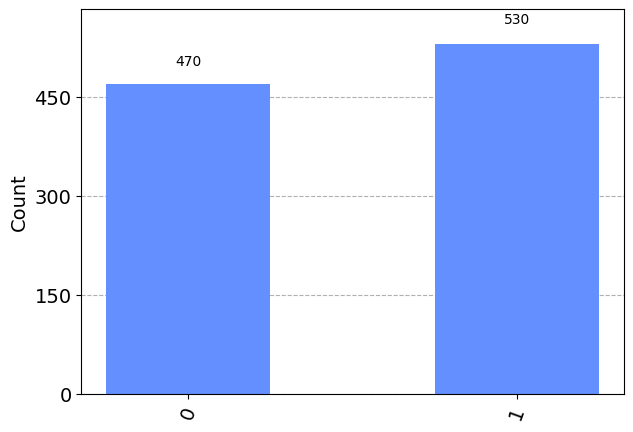

In [7]:
#Program 3.5 Measure state of qubit w/ X-gate and H-gate
from qiskit import QuantumCircuit,execute
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram
qc = QuantumCircuit(1,1)
qc.x(0)
qc.h(0)
qc.measure([0],[0])
print("This is |->:")
print(qc)
sim=AerSimulator()
job=execute(qc, backend=sim, shots=1000)
result=job.result()
counts=result.get_counts(qc)
print("Counts:",counts)
plot_histogram(counts)

Two-Qubits
---
 are generated by tensor product as follows:
\begin{eqnarray}
   | 00\rangle &=& |0\rangle \otimes |0\rangle \\
               &=&  \pmatrix{\color{red}1\\\color{blue}0}\otimes\pmatrix{1\\0} 
               &=&  \pmatrix{{\color{red}1}\times\pmatrix{1\\0}\\ {\color{blue}0}\times\pmatrix{1\\0}}
               &=&\pmatrix{\color{red}1\\\color{red}0\\0\\0} \cr
   | 01\rangle &=& |0\rangle \otimes |1\rangle &=& \pmatrix{0\\1\\0\\0} \cr  
   | 10\rangle &=& |1\rangle \otimes |0\rangle &=& \pmatrix{0\\0\\1\\0} \cr 
   | 11\rangle &=& |1\rangle \otimes |1\rangle &=& \pmatrix{0\\0\\0\\1} \cr 
\end{eqnarray}   

Pass: ContainsInstruction - 0.01287 (ms)
Pass: UnitarySynthesis - 0.00286 (ms)
Pass: HighLevelSynthesis - 0.23317 (ms)
Pass: UnrollCustomDefinitions - 0.10586 (ms)
Begin BasisTranslator from source basis {('measure', 1), ('h', 1)} to target basis {'csx', 'save_probabilities', 'mcy', 'measure', 'barrier', 'unitary', 'cy', 'u3', 'mcp', 'cswap', 'kraus', 'initialize', 'ecr', 'mcrz', 'mcu1', 'save_amplitudes_sq', 'cu1', 'mcry', 'reset', 'for_loop', 'save_stabilizer', 'tdg', 'set_unitary', 'rzx', 'mcu', 'sdg', 'mcz', 'qerror_loc', 'set_matrix_product_state', 'u1', 'swap', 'save_density_matrix', 'save_probabilities_dict', 'save_state', 'ccx', 'z', 'save_expval', 'mcx_gray', 'mcr', 'cp', 'mcphase', 'save_clifford', 'cu3', 'rz', 'if_else', 'r', 'save_unitary', 'cu2', 'superop', 'save_superop', 'roerror', 'save_statevector', 'while_loop', 'cz', 'mcsx', 'sx', 'cu', 'cx', 'mcx', 'rx', 'x', 'ry', 'ryy', 'save_statevector_dict', 'set_superop', 'u', 'mcu2', 'multiplexer', 'delay', 's', 'u2', 't', 's

This is |++>:
     ┌───┐┌─┐   
q_0: ┤ H ├┤M├───
     ├───┤└╥┘┌─┐
q_1: ┤ H ├─╫─┤M├
     └───┘ ║ └╥┘
c: 2/══════╩══╩═
           0  1 
Counts: {'01': 258, '00': 246, '10': 233, '11': 263}


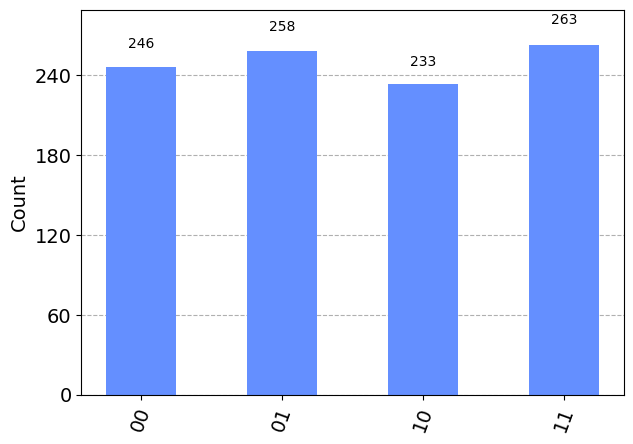

In [8]:
#Program 3.6 Measure state of qubit w/ H-gate
from qiskit import QuantumCircuit,execute
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram
qc = QuantumCircuit(2,2)
qc.h(0)
qc.h(1)
qc.measure([0,1],[0,1])
print("This is |++>:")
print(qc)
sim=AerSimulator()
job=execute(qc, backend=sim, shots=1000)
result=job.result()
counts=result.get_counts(qc)
print("Counts:",counts)
plot_histogram(counts)

Explain
---
Since
$$|+\rangle =\frac{1}{\sqrt2}\left(|0\rangle+|1\rangle\right)$$
the two-qubits of two $|+\rangle$'s is  
$$   |+\rangle \otimes |+\rangle=
    \frac{1}{\sqrt2}\left(|0\rangle+|1\rangle\right)\otimes\frac{1}{\sqrt2}\left(|0\rangle+|1\rangle\right)=
\frac{1}{4}\left(|00\rangle+|01\rangle+|10\rangle+|11\rangle\right)$$

As well-knows, $X$-gate is rotated about $X$-axis with 180$^\circ$, however, we can also rotate qubit in any angle by $R[X,Y,Z]$ as follows:

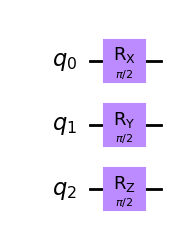

In [2]:
#Program 3.8a Apply RX-, RY-, and RZ-gate to qubit
from qiskit import QuantumCircuit
from math import pi
qc = QuantumCircuit(3)
qc.rx(pi/2, 0)
qc.ry(pi/2, 1)
qc.rz(pi/2, 2)
qc.draw('mpl')

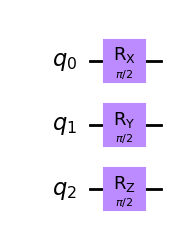

In [11]:
#Program 3.8a Apply RX-, RY-, and RZ-gate to qubit
from qiskit import QuantumCircuit
from math import pi
qc = QuantumCircuit(3)
qc.rx(pi/2, 0)
qc.ry(pi/2, 1)
qc.rz(pi/2, 2)
qc.draw('mpl')

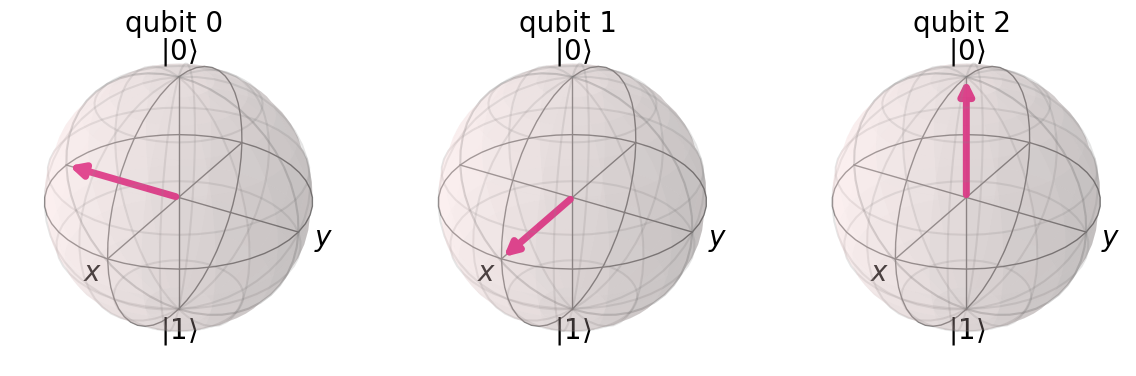

In [12]:
#Program 3.8b Show Bloch sphere of qubit w/ RX-, RY-, and RZ-gate
from qiskit.quantum_info import Statevector
state = Statevector.from_instruction(qc)
state.draw('bloch')

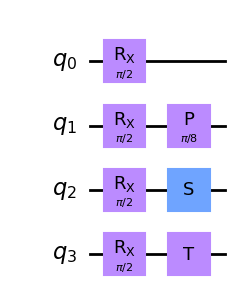

In [14]:
#Program 3.9a Apply RX-, P-, S-, T-gate to qubit
from qiskit import QuantumCircuit
import math
qc = QuantumCircuit(4)
qc.rx(pi/2, [0,1,2,3])
qc.p(pi/8, 1)
qc.s(2)
qc.t(3)
qc.draw('mpl')

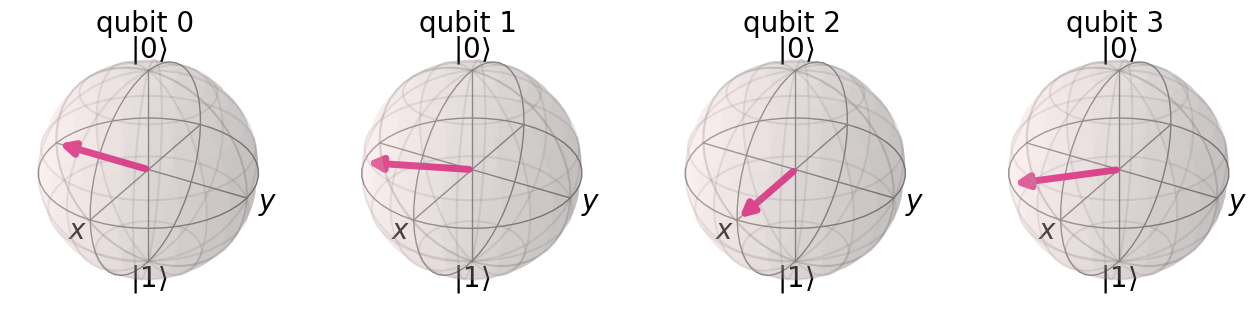

In [15]:
#Program 3.9b Show Bloch sphere of qubit w/ RX-, P-, S-, and T-gate
from qiskit.quantum_info import Statevector
state = Statevector.from_instruction(qc)
state.draw('bloch')

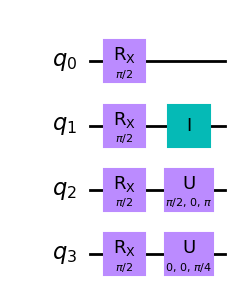

In [16]:
#Program 3.10a Apply RX-, I-, and U-gate to qubit
from qiskit import QuantumCircuit
from math import pi
qc = QuantumCircuit(4)
qc.rx(pi/2, [0,1,2,3])
qc.i(1)
qc.u(pi/2, 0, pi, 2)
qc.u(0,0, pi/4, 3)
qc.draw('mpl')

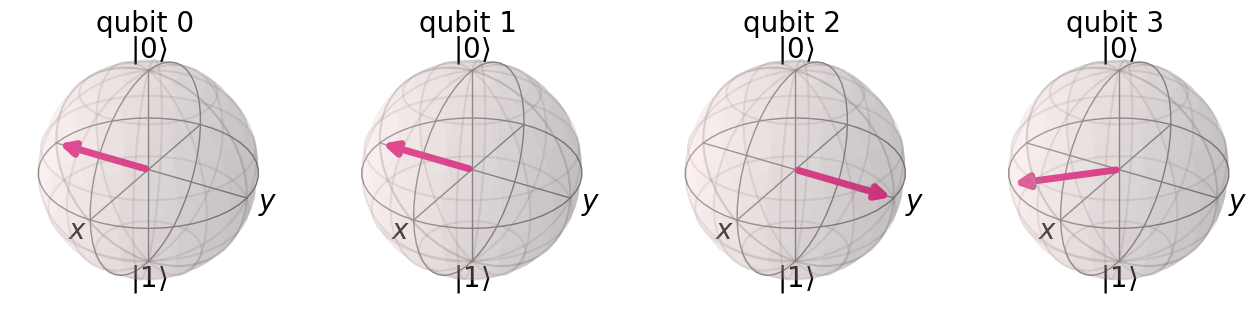

In [17]:
#Program 3.10b Show Bloch sphere of qubit w/ RX-, I-, and U-gate
from qiskit.quantum_info import Statevector
state = Statevector.from_instruction(qc)
state.draw('bloch')

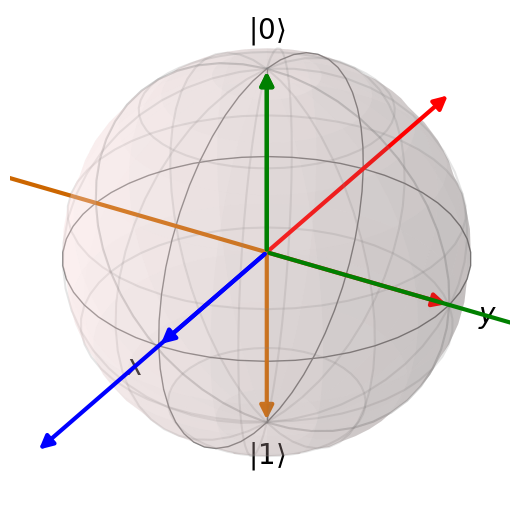

In [19]:
import qutip
import matplotlib.pyplot as plt

# Define the Bloch sphere
bloch_sphere = qutip.Bloch()

# Add the states to the sphere
bloch_sphere.add_states([qutip.basis(2, 0),    # |0>
                         qutip.basis(2, 1),    # |1>
                         qutip.basis(2, 0) + qutip.basis(2, 1),    # |+>
                         qutip.basis(2, 0) - qutip.basis(2, 1),    # |->
                         qutip.basis(2, 0) + 1j * qutip.basis(2, 1),    # |↻>
                         qutip.basis(2, 0) - 1j * qutip.basis(2, 1)])    # |↺>

# Add the axes to the sphere
bloch_sphere.add_vectors([1, 0, 0])    # X axis
bloch_sphere.add_vectors([0, 1, 0])    # Y axis
bloch_sphere.add_vectors([0, 0, 1])    # Z axis

# Define a random quantum state vector
import numpy as np
vector = np.random.rand(2)
vector /= np.linalg.norm(vector)
psi = qutip.Qobj(vector)

# Add the vector to the sphere
#bloch_sphere.add_vectors(psi.bloch())
# Add the vector to the sphere
bloch_sphere.add_vectors(psi.bloch_vec)


# Show the Bloch sphere
bloch_sphere.show()

# Save the Bloch sphere to a file
plt.savefig('bloch_sphere.png')


In [15]:
!pip install qutip


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 1.3 MB/s eta 0:00:0000:0100:010m

[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
